<img width=200 src="https://www.smhi.se/polopoly_fs/1.135796.1527766089!/image/LoggaEUCP.png_gen/derivatives/Original_366px/image/LoggaEUCP.png"> <img width=200 src="https://zenodo.org/api/files/00000000-0000-0000-0000-000000000000/is-enes3/logo.png"> <img width=200 src="https://www.dtls.nl/wp-content/uploads/2015/03/NleSc.png"> <img width=200 src="https://www.dkrz.de/@@site-logo/dkrz.svg"> <img width=200 src="https://jupyter.org/assets/homepage/hublogo.svg"> <img width=200 src="https://docs.esmvaltool.org/en/v2.5.0/_static/ESMValTool-logo-2.png">

# Introduction to ESMValTool

[ESMValTool](https://github.com/ESMValGroup/ESMValTool) is a library of climate data analysis workflows ("recipes") and [ESMValCore](https://github.com/ESMValGroup/ESMValCore) is the tool that can run those recipes. With ESMValTool, it is easy to reproduce already published analyses as well as develop new ones. A useful feature is that you can directly access all the output (data, images, etc) and further process them in the notebook. ESMValTool has specifically been designed to analyse data produced as part of the [Climate Model Intercomparison Project](https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6), though it also [supports many observational and reanalysis datasets](https://docs.esmvaltool.org/en/latest/input.html#supported-datasets-for-which-a-cmorizer-script-is-available). It is used extensively to (re)produce the analyses in the [IPCC Assessment Reports](https://www.ipcc.ch/assessment-report/ar6/).

In [1]:
# Import the tool
import esmvalcore.experimental as esmvaltool

# Import tools for plotting
import matplotlib.pyplot as plt
import iris.quickplot

/home/k/k206100/.conda/envs/esmvaltool/lib/python3.10/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498
ERROR 1: PROJ: proj_create_from_database: Open of /home/k/k206100/.conda/envs/esmvaltool/share/proj failed


## Working with ESMValTool recipes

To see a list of [all the available ESMValTool recipes](https://docs.esmvaltool.org/en/latest/recipes/index.html) (only the first 10 are shown here):

In [2]:
all_recipes = esmvaltool.get_all_recipes()
all_recipes[:10]

[Recipe('Recipe eady growth rate'),
 Recipe('Recipe autoassess radiation rms cfmon all'),
 Recipe('Recipe ecs scatter'),
 Recipe('Recipe ocean bgc'),
 Recipe('Recipe miles block'),
 Recipe('Recipe tcr'),
 Recipe('Recipe impact'),
 Recipe('Recipe extreme index'),
 Recipe('Recipe seaice feedback'),
 Recipe('Recipe wenzel16nat')]

In this notebook, we'll just run the following recipe. Documentation for this recipe is available [here](https://docs.esmvaltool.org/en/latest/recipes/recipe_consecdrydays.html).

In [3]:
example_recipe = esmvaltool.get_recipe("recipe_consecdrydays.yml")
example_recipe

Recipe('Recipe consecdrydays')

The recipe contains a [specification](https://docs.esmvaltool.org/projects/esmvalcore/en/latest/recipe/overview.html) that describes the analysis to run. It is written in YAML format. The most important elements are:
- which variables to use
- from which datasets
- how to preprocess (e.g. regrid, compute statistics, etc) those
- and finally, which analysis scripts to run

This recipe looks like this:

In [4]:
print(example_recipe.path.read_text())

# ESMValTool
# recipe_consecdrydays
---
documentation:
  title: Consecutive dry days

  description: |
    Recipe to calculate consecutive dry days

  authors:
    - berg_peter

  projects:
    - c3s-magic

  references:
    - acknow_project

datasets:
  - {dataset: bcc-csm1-1-m, project: CMIP5, mip: day, exp: historical, ensemble: r1i1p1, start_year: 2001, end_year: 2002}

diagnostics:

  dry_days:
    description: Calculating number of dry days.
    variables:
      pr:
    scripts:
      consecutive_dry_days:
        script: droughtindex/diag_cdd.py
        dryindex: 'cdd'
        plim: 1
        frlim: 5
        quickplot:
          plot_type: pcolormesh



## Configuring the tool

The [user configuration file](https://docs.esmvaltool.org/projects/esmvalcore/en/latest/quickstart/configure.html) is where you configure the tool. For example, the `rootpath` setting tells the tool where your data lives, if you have any.  Typically this file is stored in `~/.esmvaltool/config-user.yml`. 

In [5]:
esmvaltool.CFG

Config({'auxiliary_data_dir': PosixPath('/work/bd0854/DATA/ESMValTool2/AUX'),
        'compress_netcdf': False,
        'config_developer_file': None,
        'config_file': PosixPath('/home/k/k206100/.esmvaltool/config-user.yml'),
        'download_dir': PosixPath('/home/k/k206100/climate_data'),
        'drs': {'CMIP3': 'DKRZ',
                'CMIP5': 'DKRZ',
                'CMIP6': 'DKRZ',
                'CORDEX': 'BADC',
                'OBS': 'default',
                'OBS6': 'default',
                'ana4mips': 'default',
                'native6': 'default',
                'obs4MIPs': 'default'},
        'exit_on_warning': False,
        'extra_facets_dir': (),
        'log_level': 'info',
        'max_parallel_tasks': None,
        'offline': False,
        'output_dir': PosixPath('/home/k/k206100/esmvaltool_output'),
        'output_file_type': 'png',
        'profile_diagnostic': False,
        'remove_preproc_dir': True,
        'resume_from': [],
        'rootpath': 

Since version 2.4, the tool can automatically download the climate data files required to run a recipe for you. This can be enabled by setting:

In [6]:
esmvaltool.CFG['offline'] = False

To make sure that the automatic download works, we create the directory beforehand (e.g. needed when running on [Binder](https://mybinder.org/)):

In [7]:
esmvaltool.CFG['download_dir'].mkdir(exist_ok=True)

A major advantage of working on a machine like [Levante](https://docs.dkrz.de/doc/levante/index.html), is that a lot of [CMIP data is already available](https://docs.dkrz.de/doc/dataservices/finding_and_accessing_data/index.html#cmip-data-pool), so typically only a few files will need to be downloaded to run a recipe.

## Running a recipe

Let's run our first recipe and inspect the output

In [8]:
output = example_recipe.run()

## Plots and further analysis

The output of the recipe consists of images and data:

In [9]:
output

dry_days/consecutive_dry_days:
  DataFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_dryfreq.nc')
  ImageFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_drymax.png')
  DataFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_drymax.nc')
  ImageFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_dryfreq.png')

The output is also available as files:

In [10]:
for result in output['dry_days/consecutive_dry_days']:
    print(result.path)

/home/k/k206100/esmvaltool_output/recipe_consecdrydays_20220520_092610/work/dry_days/consecutive_dry_days/CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_dryfreq.nc
/home/k/k206100/esmvaltool_output/recipe_consecdrydays_20220520_092610/plots/dry_days/consecutive_dry_days/png/CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_drymax.png
/home/k/k206100/esmvaltool_output/recipe_consecdrydays_20220520_092610/work/dry_days/consecutive_dry_days/CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_drymax.nc
/home/k/k206100/esmvaltool_output/recipe_consecdrydays_20220520_092610/plots/dry_days/consecutive_dry_days/png/CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_dryfreq.png


Let's have a look at one of the plots:

ImageFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_dryfreq.png')
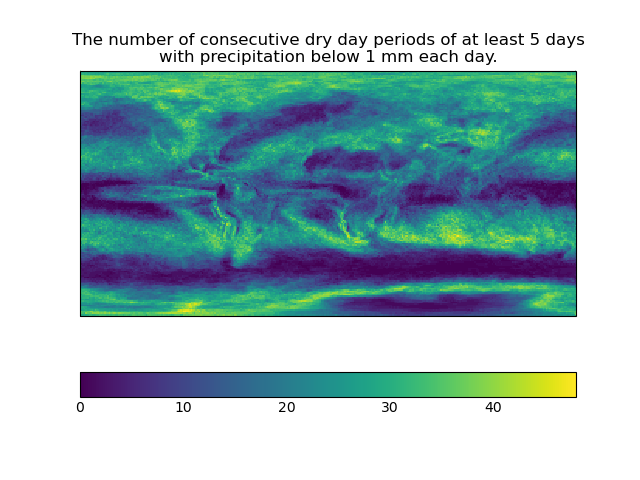

In [11]:
plots = [f for f in output['dry_days/consecutive_dry_days'] if isinstance(f, esmvaltool.recipe_output.ImageFile)]
plots[1]

The data used to create the plots is also available:

In [12]:
data_files = [f for f in output['dry_days/consecutive_dry_days'] if isinstance(f, esmvaltool.recipe_output.DataFile)]
data_files

[DataFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_dryfreq.nc'),
 DataFile('CMIP5_bcc-csm1-1-m_day_historical_r1i1p1_pr_2001-2002_drymax.nc')]

If the output is a dataset, you can load it with `xarray` or `iris`. In this way, you can immediately continue to work with the (pre-)processed data in your notebook.

In [13]:
xrds = data_files[0].load_xarray()
xrds

<xarray.Dataset>
Dimensions:    (lat: 160, lon: 320, bnds: 2)
Coordinates:
  * lat        (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon        (lon) float64 0.0 1.125 2.25 3.375 ... 355.5 356.6 357.8 358.9
    time       object 2002-01-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    dryfreq    (lat, lon) float32 19.0 20.0 21.0 20.0 ... 31.0 31.0 29.0 31.0
    lat_bnds   (lat, bnds) float64 -89.14 -88.59 -88.59 ... 88.59 88.59 89.14
    lon_bnds   (lon, bnds) float64 -0.5625 0.5625 0.5625 ... 358.3 358.3 359.4
    time_bnds  (bnds) object 2001-01-01 00:00:00 2003-01-01 00:00:00
Attributes: (12/27)
    associated_files:       baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLoc...
    branch_time:            344.0
    cmor_version:           2.5.6
    contact:                Dr. Tongwen Wu (twwu@cma.gov.cn)
    experiment:             historical
    experiment_id:          historical
    ...                     ...
    software:               Created with ESMValTool v2.5.0
    source:                 bcc-csm1-1-m:atmosphere:  BCC_AGCM2.2 (T106L26); ...
    table_id:               Table day (11 April 2011) ec52f6ea2595168e5458ad1...
    title:                  bcc-csm1-1-m model output prepared for CMIP5 hist...
    Conventions:            CF-1.7
    caption:                The number of consecutive dry day periods of at l...

In [14]:
cube = data_files[0].load_iris()[0]
cube

The Number Of Consecutive Dry Day Periods Of At Least 5 Days With Precipitation Below 1 Mm Each Day. (unknown),latitude,longitude
Shape,160,320


This allows us to create our own plot:

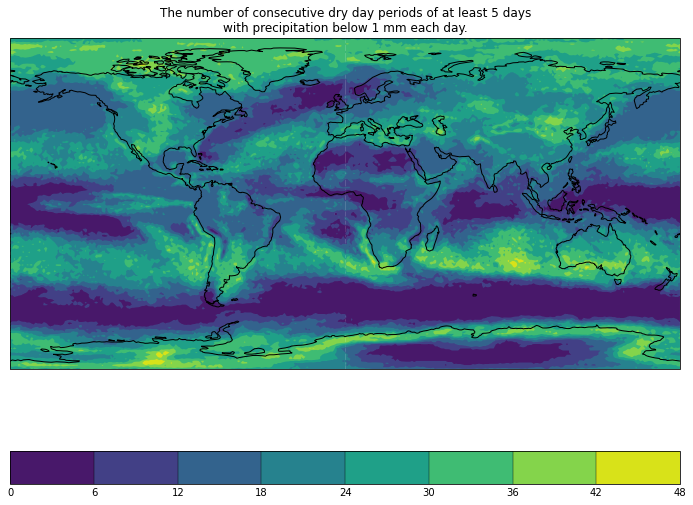

In [15]:
# Create plot
iris.quickplot.contourf(cube)

# Set the size of the figure
plt.gcf().set_size_inches(12, 10)

# Draw coastlines
plt.gca().coastlines()

# Show the resulting figure
plt.show()

## More information and contact details

For more information on all available recipes, visit the [ESMValTool documentation](https://docs.esmvaltool.org/en/latest/recipes/index.html). If this presentation has sparked your interest, you are welcome to join one of our [online monthly meetings](https://docs.esmvaltool.org/en/latest/introduction.html#monthly-meetings) (open to anyone with an interest in ESMValTool), [mailing list](https://docs.esmvaltool.org/en/latest/introduction.html#user-mailing-list), or join us on [GitHub](https://github.com/esmvalgroup/esmvaltool/discussions).
